In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/a3case/Books_rating.csv')
# # df['text'] = df['text'].fillna('')
# df_sample = df.sample(frac=0.01)
# df_sample.to_csv('/content/drive/MyDrive/Colab Notebooks/a3case/Books_rating_sample.csv', index=False)
# print(df_sample.shape)
# df_sample.head()

In [2]:
with open("/content/drive/MyDrive/Colab Notebooks/a3case/Books_rating_sentiment_sample.pkl", 'rb') as file:
  results = pickle.load(file)
results_df = pd.DataFrame(results)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/a3case/Books_rating_sample.csv')

In [4]:
df['label'], df['confidence'] = results_df['label'], results_df['score']

In [5]:

# 1. Correlation analysis
score_label_correlation = df['score'].corr(df['label'].map({'NEGATIVE': 0, 'POSITIVE': 1}))
confidence_score_correlation = df['confidence'].corr(df['score'])

# 2 & 3. Confusion matrix and accuracy metrics
df['binary_score'] = df['score'].apply(lambda x: 'POSITIVE' if x > 3 else 'NEGATIVE')
conf_matrix = confusion_matrix(df['binary_score'], df['label'])
class_report = classification_report(df['binary_score'], df['label'])

# 4. Confidence threshold analysis
thresholds = np.arange(0.5, 1.0, 0.05)
accuracies = []
for threshold in thresholds:
    high_conf = df[df['confidence'] >= threshold]
    accuracy = (high_conf['binary_score'] == high_conf['label']).mean()
    accuracies.append(accuracy)

# 5. Error analysis
errors = df[df['binary_score'] != df['label']]
high_conf_errors = errors[errors['confidence'] > 0.9]

# # 6. Distribution analysis
# positive_scores = df[df['label'] == 'POSITIVE']['score']
# negative_scores = df[df['label'] == 'NEGATIVE']['score']

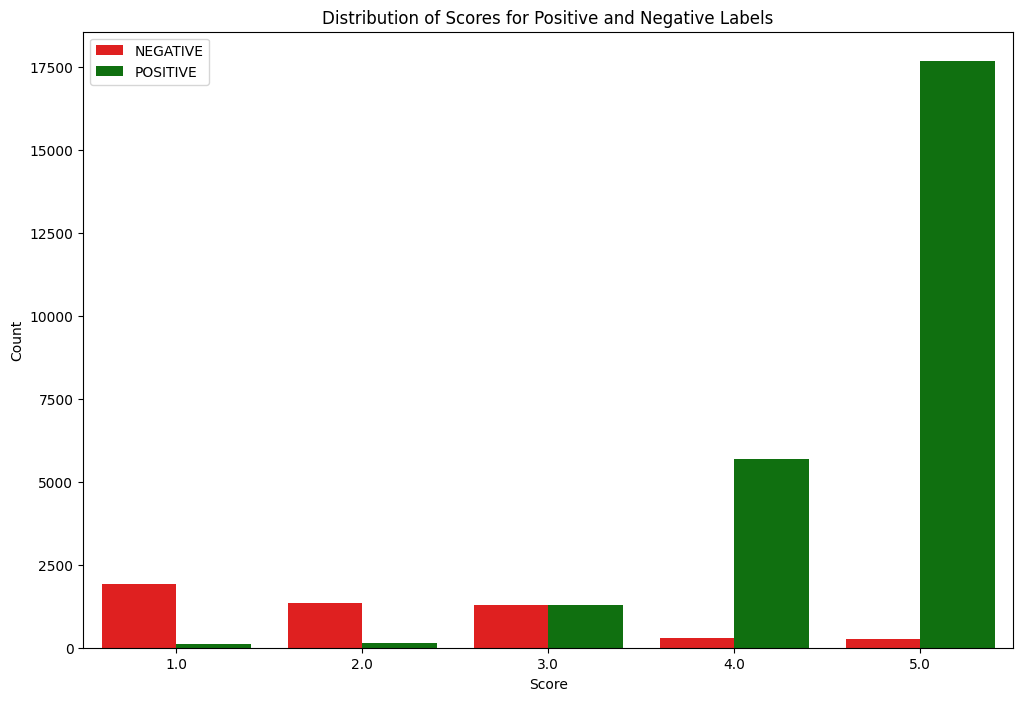

In [6]:
# Plotting
score_counts = df.groupby(['score', 'label']).size().reset_index(name='count')
# Define a custom color palette
custom_palette = {'POSITIVE': 'green', 'NEGATIVE': 'red'}

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=score_counts, x='score', y='count', hue='label', palette=custom_palette)

plt.title('Distribution of Scores for Positive and Negative Labels')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend()
plt.show()

In [7]:

# Print results
print(f"Score-Label Correlation: {score_label_correlation}")

Score-Label Correlation: 0.7786242292288288


In [8]:
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[ 4545  1523]
 [  570 23362]]


In [9]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.89      0.75      0.81      6068
    POSITIVE       0.94      0.98      0.96     23932

    accuracy                           0.93     30000
   macro avg       0.91      0.86      0.88     30000
weighted avg       0.93      0.93      0.93     30000



In [10]:
print("\nHigh Confidence Errors:")
high_conf_errors[['text','score','label']].head().to_dict('records')


High Confidence Errors:


[{'text': "Isaac Asimov's novels and short stories are among my favourite. The first three FOUNDATION books are better than most contemporary works of science fiction, and I, ROBOT is, in my opinion, the best collection of robot stories ever. Even his stories in THE EARLY ASIMOV are a lot of fun.It is because Asimov has been so good that this collection of puzzle stories was surprising. Asimov clearly has a passion for puzzles but his ability to incorporate that element into a good story is not demonstrated by this book. As one reviewer mentioned, you'll find out all sorts of interesting trivia by reading these stories but you shouldn't expect to arrive at the solutions to the puzzles through deduction. Simply put, if you want to play along (and who doesn't when reading a mystery?), you'll need to know a lot of throw-away information.Another quibble I had with the Black Widower stories was that the cast consists of Mastermind champions. No piece of information is too obscure or esoteri

In [11]:
print("\nAccuracy vs Confidence Threshold:")
for thresh, acc in zip(thresholds, accuracies):
    print(f"Threshold {thresh:.2f}: Accuracy {acc:.4f}")



Accuracy vs Confidence Threshold:
Threshold 0.50: Accuracy 0.9302
Threshold 0.55: Accuracy 0.9303
Threshold 0.60: Accuracy 0.9304
Threshold 0.65: Accuracy 0.9304
Threshold 0.70: Accuracy 0.9305
Threshold 0.75: Accuracy 0.9306
Threshold 0.80: Accuracy 0.9307
Threshold 0.85: Accuracy 0.9309
Threshold 0.90: Accuracy 0.9310
Threshold 0.95: Accuracy 0.9312


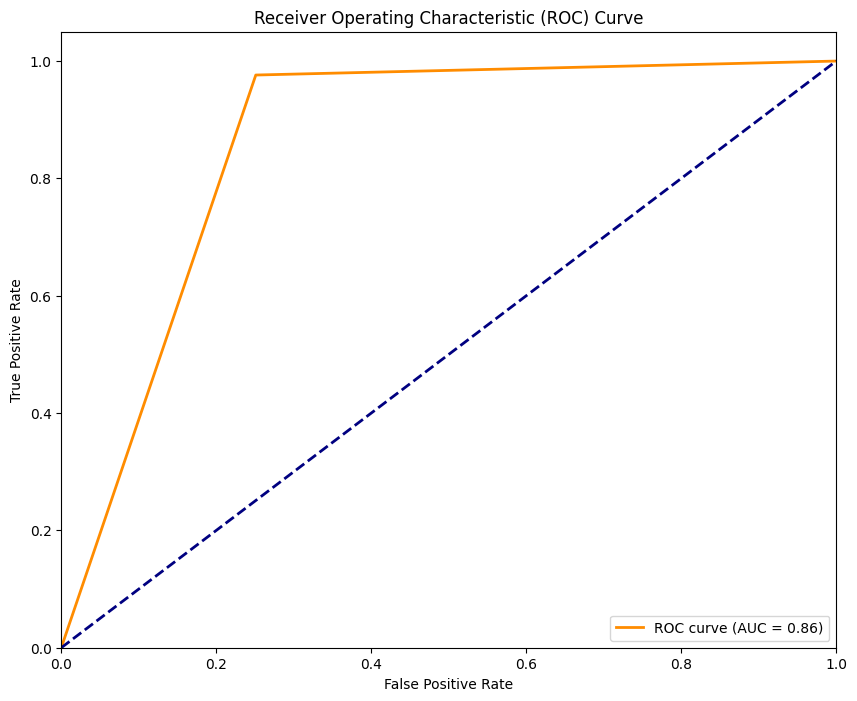

AUC: 0.8626


In [12]:


# Convert labels to binary (0 for NEGATIVE, 1 for POSITIVE)
y_true = (df['binary_score'] == 'POSITIVE').astype(int)
y_scores = (df['label'] == 'POSITIVE').astype(int)

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")